In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 
%matplotlib inline

In [12]:
# fix random seed for reproducibility
np.random.seed(10)
#see current working directory
cwd = os.getcwd()
#change it to the current path
os.chdir("C:/Users/mukul.virmani/")
# load the dataset
path = './Desktop/CPI_US_Medical.csv'
def getTansformedData(path):
    frame = pd.read_csv(path,engine='python',skiprows=0)
    return frame

In [13]:
data=getTansformedData(path)  
def num_missing(x):
    return sum(x.isnull())
data.apply(num_missing, axis=0)

series_id    0
year         0
period       0
value        0
Month        0
Date         0
dtype: int64

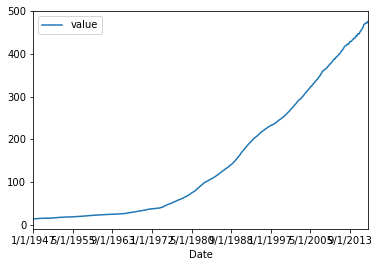

In [14]:
data.plot(x='Date',y='value')
plt.show()
plt.savefig('C:/Users/mukul.virmani/ARIMA_DEMO.png')

In [15]:
def Change_Dtypes(data):
    data['Date']=pd.to_datetime(data['Date'],coerce=True)
    return data
Change_Dtypes(data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  from ipykernel import kernelapp as app


,series_id,year,period,value,Month,Date
0,CUSR0000SAM,1947,M01,13.200,1,1947-01-01
1,CUSR0000SAM,1947,M02,13.300,2,1947-02-01
2,CUSR0000SAM,1947,M03,13.300,3,1947-03-01
3,CUSR0000SAM,1947,M04,13.400,4,1947-04-01
4,CUSR0000SAM,1947,M05,13.500,5,1947-05-01
5,CUSR0000SAM,1947,M06,13.500,6,1947-06-01
6,CUSR0000SAM,1947,M07,13.500,7,1947-07-01
7,CUSR0000SAM,1947,M08,13.600,8,1947-08-01
8,CUSR0000SAM,1947,M09,13.700,9,1947-09-01
9,CUSR0000SAM,1947,M10,13.800,10,1947-10-01


In [16]:
def test_stationarity(timeseries):
#     #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)

#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(12, 8))
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(data.value)

Results of Dickey-Fuller Test
Test Statistic                   1.186506
p-value                          0.995891
#Lags Used                      21.000000
Number of Observations Used    825.000000
Critical Value (1%)             -3.438301
Critical Value (5%)             -2.865050
Critical Value (10%)            -2.568639
dtype: float64


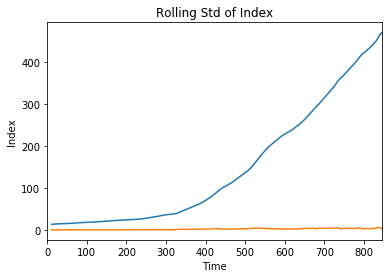

In [17]:
def Plot_rolling_stats(value):
    #test_stationarity(data.value)
    var_index = value.rolling(12).std()
    mean_index = value.rolling(12).mean()
    mean_index.plot()
    plt.title("Rolling Mean of Index")
    plt.xlabel("Time")
    plt.ylabel("Index")
    var_index.plot()
    plt.title("Rolling Std of Index")
    plt.xlabel("Time")
    plt.ylabel("Index")
Plot_rolling_stats(data.value)

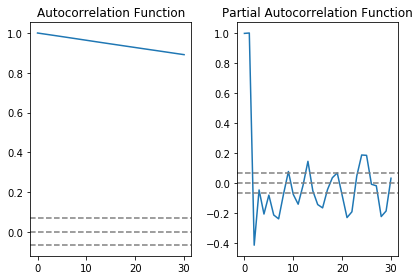

In [18]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=30)
    lag_pacf = pacf(value, nlags=30, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
Plot_ACF_PACF(data.value)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


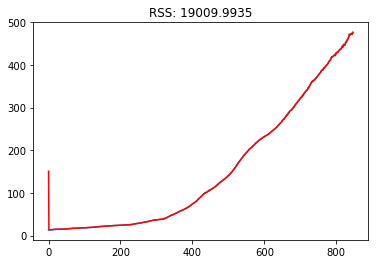

In [25]:
def build_ARIMA_model(value):
    model = ARIMA(np.array(value), order=(2,0,0))
    results_AR = model.fit(disp=-1)
    plt.plot(value)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-value)**2))
    return results_AR.fittedvalues,value
pred,true=build_ARIMA_model(data.value)

In [26]:
def Find_RMSE_MAE(x,x1,i):
        if i==1:
            return math.sqrt(mean_squared_error(x, x1))
        else:
            return mean_absolute_error(x, x1)
# calculate root mean squared error
trerr= Find_RMSE_MAE(true,pred,1)
print('Train Score: %.2f RMSE' %(trerr))
# calculate mean absloute error
meanerrtr = Find_RMSE_MAE(true,pred,0)
print ('Train Score: %.2f MAE' %(meanerrtr))

Train Score: 4.74 RMSE
Train Score: 0.38 MAE
